In [ ]:
import pandas as pd
data = pd.read_csv('/content/mgcu Temperature data of 25 years.csv')
data.head()


,DATE,TEMPERATURE
0,10-08-1998,30.46
1,11-08-1998,29.19
2,12-08-1998,30.83
3,13-08-1998,28.33
4,14-08-1998,27.62


In [ ]:
df = data.set_index(pd.DatetimeIndex(data['DATE']))
df

<ipython-input-2-c766c93a47d6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = data.set_index(pd.DatetimeIndex(data['DATE']))


,DATE,TEMPERATURE
DATE,,
1998-10-08,10-08-1998,30.46
1998-11-08,11-08-1998,29.19
1998-12-08,12-08-1998,30.83
1998-08-13,13-08-1998,28.33
1998-08-14,14-08-1998,27.62
...,...,...
2023-05-08,05-08-2023,31.28
2023-06-08,06-08-2023,31.93
2023-07-08,07-08-2023,28.81


In [ ]:
#convert the 'DATE column to a datatime type
data['DATE'] = pd.to_datetime(data['DATE'])

#Set the 'DATE column as the index
data.set_index('DATE', inplace=True)
data

<ipython-input-3-c72bdb29f296>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['DATE'] = pd.to_datetime(data['DATE'])


,TEMPERATURE
DATE,
1998-10-08,30.46
1998-11-08,29.19
1998-12-08,30.83
1998-08-13,28.33
1998-08-14,27.62
...,...
2023-05-08,31.28
2023-06-08,31.93
2023-07-08,28.81


In [ ]:
data

,TEMPERATURE
DATE,
1998-10-08,30.46
1998-11-08,29.19
1998-12-08,30.83
1998-08-13,28.33
1998-08-14,27.62
...,...
2023-05-08,31.28
2023-06-08,31.93
2023-07-08,28.81


In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.metrics import accuracy_score

data.head()
data.describe()

,TEMPERATURE
count,9131.000000
mean,26.093223
std,7.242553
min,7.190000
25%,20.030000
50%,27.610000
75%,31.165000
max,43.660000


In [ ]:
sequence=data['TEMPERATURE']
print(sequence)

DATE
1998-10-08    30.46
1998-11-08    29.19
1998-12-08    30.83
1998-08-13    28.33
1998-08-14    27.62
              ...  
2023-05-08    31.28
2023-06-08    31.93
2023-07-08    28.81
2023-08-08    29.76
2023-09-08    29.72
Name: TEMPERATURE, Length: 9131, dtype: float64


In [ ]:
import numpy as np

def split_sequence(sequence, n_steps):
    x, y = [], []
    for i in range(len(sequence)):
        # find the end of this pattern
        end_idx = i + n_steps
        # check if we are beyond the sequence
        if end_idx > len(sequence) - 1:
            break
        # gather input and output parts of the pattern
        seq_x = sequence[i:end_idx]
        seq_y = sequence[end_idx]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [ ]:
n_steps=100
x,y=split_sequence(sequence,n_steps)
#x=np.array(x).reshape(-1)
print(x,y)
print(len(x),len(y))

[[30.46 29.19 30.83 ... 21.31 22.19 21.71]
 [29.19 30.83 28.33 ... 22.19 21.71 22.75]
 [30.83 28.33 27.62 ... 21.71 22.75 24.5 ]
 ...
 [34.14 28.82 28.44 ... 31.71 31.28 31.93]
 [28.82 28.44 31.62 ... 31.28 31.93 28.81]
 [28.44 31.62 31.34 ... 31.93 28.81 29.76]] [22.75 24.5  24.82 ... 28.81 29.76 29.72]
9031 9031


#  **Applying LSTM**
FIND Y_CAP USING LSTM


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


res=[]

# Fit the model
model.fit(x, y, epochs=10, verbose=1)

for i in x:
    # Demonstrate prediction
    x_input = np.array(i)
    x_input = x_input.reshape((1, n_steps, n_features))
    y_cap_lstm = model.predict(x_input, verbose=0)
    res.append(y_cap_lstm)

y_cap=res
y_cap_LSTM = [element for sublist in y_cap for subsublist in sublist for element in subsublist]
print(y_cap_LSTM)

Epoch 1/10
283/283 [==============================] - 16s 47ms/step - loss: nan
Epoch 2/10
283/283 [==============================] - 14s 48ms/step - loss: nan
Epoch 3/10
283/283 [==============================] - 13s 48ms/step - loss: nan
Epoch 4/10
283/283 [==============================] - 15s 54ms/step - loss: nan
Epoch 5/10
283/283 [==============================] - 14s 50ms/step - loss: nan
Epoch 6/10
283/283 [==============================] - 13s 47ms/step - loss: nan
Epoch 7/10
283/283 [==============================] - 13s 47ms/step - loss: nan
Epoch 8/10
283/283 [==============================] - 14s 49ms/step - loss: nan
Epoch 9/10
283/283 [==============================] - 13s 47ms/step - loss: nan
Epoch 10/10
283/283 [==============================] - 13s 48ms/step - loss: nan


In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y, y_cap_LSTM)
mse = metrics.mean_squared_error(y, y_cap_LSTM)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y,y_cap_LSTM)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.8581933599557698
MSE: 1.3093068102762269
RMSE: 1.1442494528188454
R-Squared: 0.9750382279634686


Text(0, 0.5, 'y_cap_LSTM')

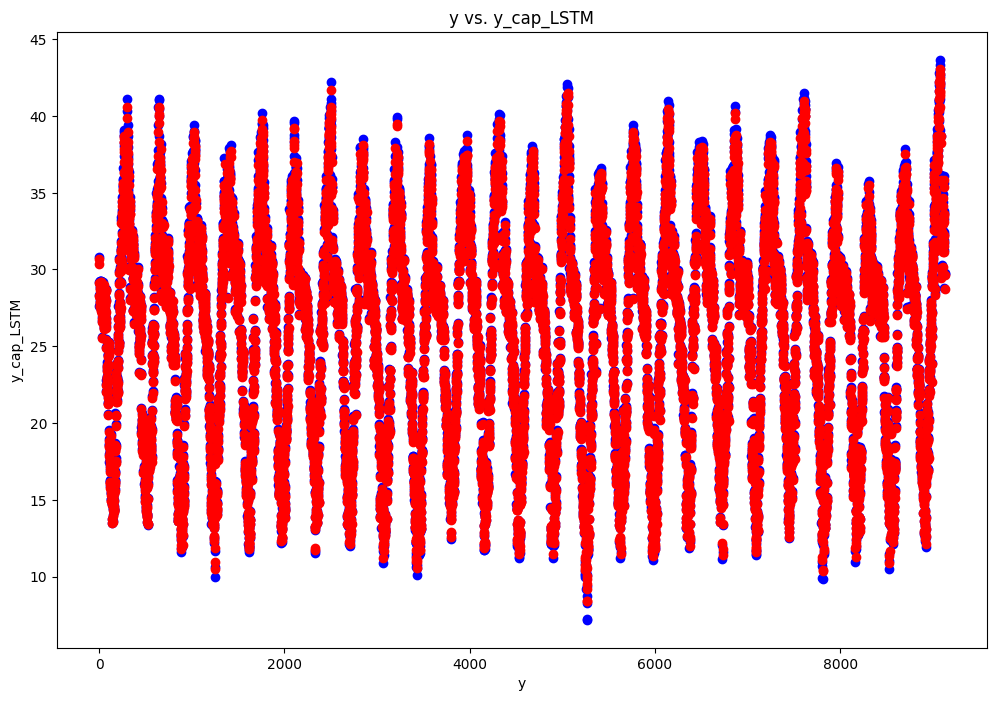

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(range(len(y)), y, color='blue', label='y')
plt.scatter(range(len(y_cap_LSTM)), y_cap_LSTM, color='red', label='y_cap_LSTM')
plt.title('y vs. y_cap_LSTM')
plt.xlabel('y')
plt.ylabel('y_cap_LSTM')



Text(0, 0.5, 'y_cap_LSTM')

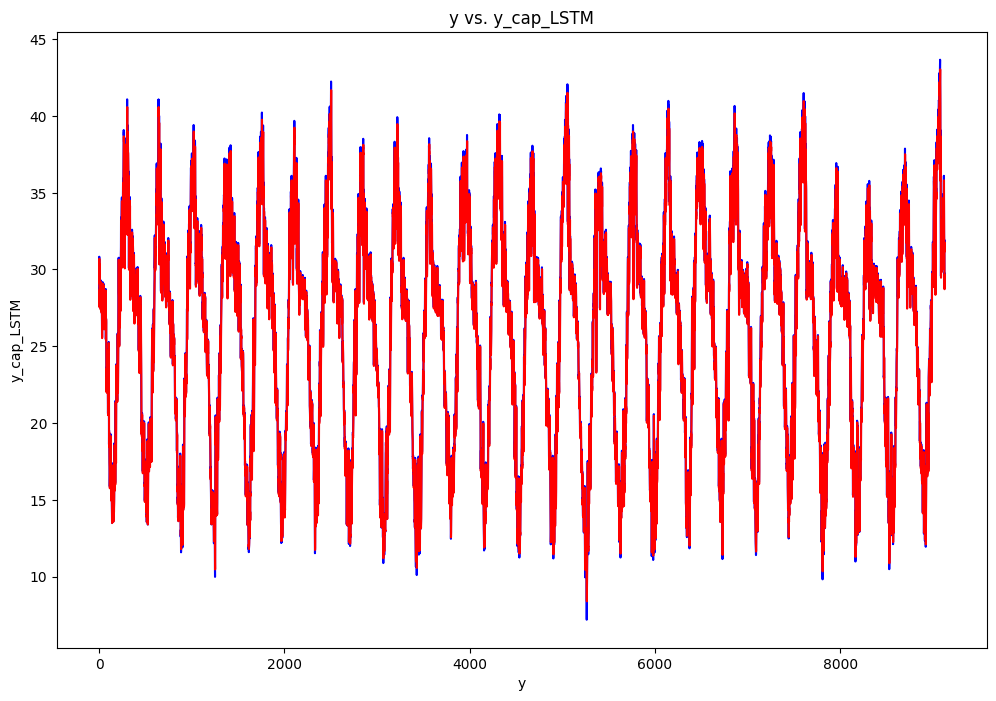

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y,'blue')
plt.plot(y_cap_LSTM,color='red')
plt.title('y vs. y_cap_LSTM')
plt.xlabel('y')
plt.ylabel('y_cap_LSTM')

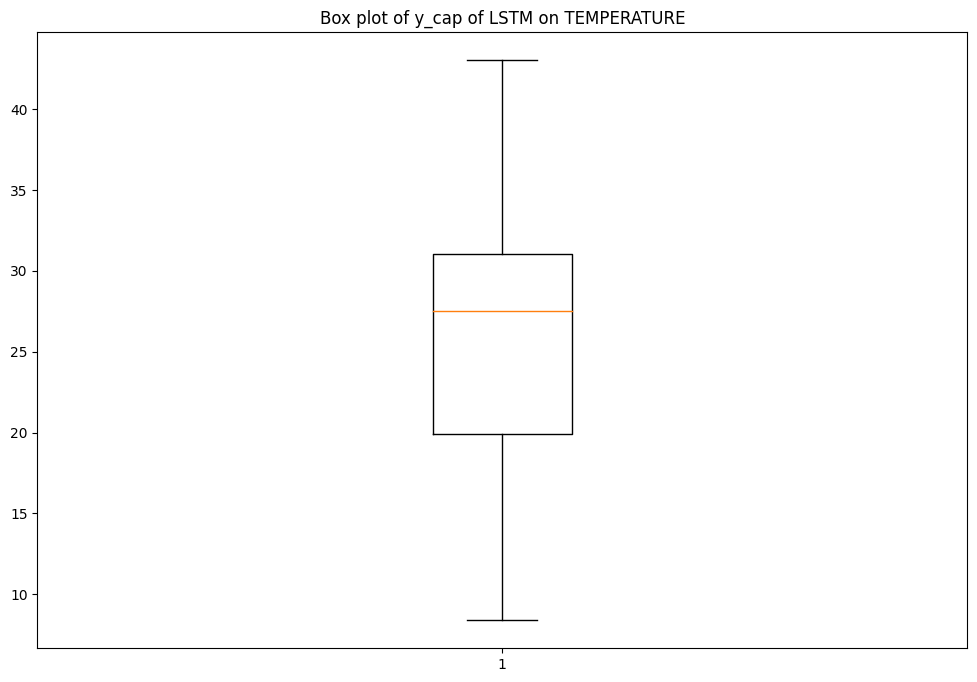

In [ ]:
plt.figure(figsize=(12,8))
plt.boxplot(y_cap_LSTM)



# Adding title
plt.title("Box plot of y_cap of LSTM on TEMPERATURE")
plt.show()

# **Applying Bi-LSTM**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

res=[]

# Fit the model
model.fit(x, y, epochs=200, verbose=0)

for i in x:
    # Demonstrate prediction
    x_input = np.array(i)
    x_input = x_input.reshape((1, n_steps, n_features))
    y_cap_lstm = model.predict(x_input, verbose=0)
    res.append(y_cap_lstm)

y_cap=res
y_cap_BI_LSTM = [element for sublist in y_cap for subsublist in sublist for element in subsublist]
print(y_cap_BI_LSTM)


[30.29052, 29.049032, 30.651152, 28.204943, 27.505863, 28.23443, 28.63716, 27.77195, 27.584738, 29.08822, 27.584738, 27.860579, 28.784338, 28.136108, 28.136108, 29.08822, 28.372025, 27.34804, 28.862791, 29.117617, 29.137205, 28.990232, 27.288828, 28.126274, 27.426966, 27.722698, 28.676416, 27.130856, 27.259218, 27.535442, 27.426966, 26.5474, 25.505314, 26.775026, 27.101227, 27.387508, 27.821192, 28.764717, 29.039236, 28.008224, 27.939335, 27.96886, 27.7621, 27.95902, 28.136108, 28.116436, 28.813759, 28.941223, 28.214773, 27.07159, 26.71567, 26.269981, 26.160904, 26.379007, 26.071617, 26.527594, 26.587006, 27.712845, 27.62416, 28.077095, 28.44079, 28.067257, 27.012306, 27.091347, 27.565022, 27.801497, 27.17036, 27.288828, 26.676092, 27.229603, 28.597898, 27.909803, 28.558634, 25.375956, 26.190659, 26.72556, 26.47808, 24.837831, 22.451313, 21.997635, 22.682926, 22.894228, 22.763443, 23.55721, 22.974682, 22.42109, 21.947184, 22.823812, 23.376568, 23.677563, 23.85798, 24.318426, 24.308428,

In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y, y_cap_BI_LSTM)
mse = metrics.mean_squared_error(y, y_cap_BI_LSTM)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y,y_cap_BI_LSTM)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.8648762516385231
MSE: 1.3197389140533264
RMSE: 1.1487989006146055
R-Squared: 0.9748393411981194


Text(0, 0.5, 'y_cap_BI_LSTM')

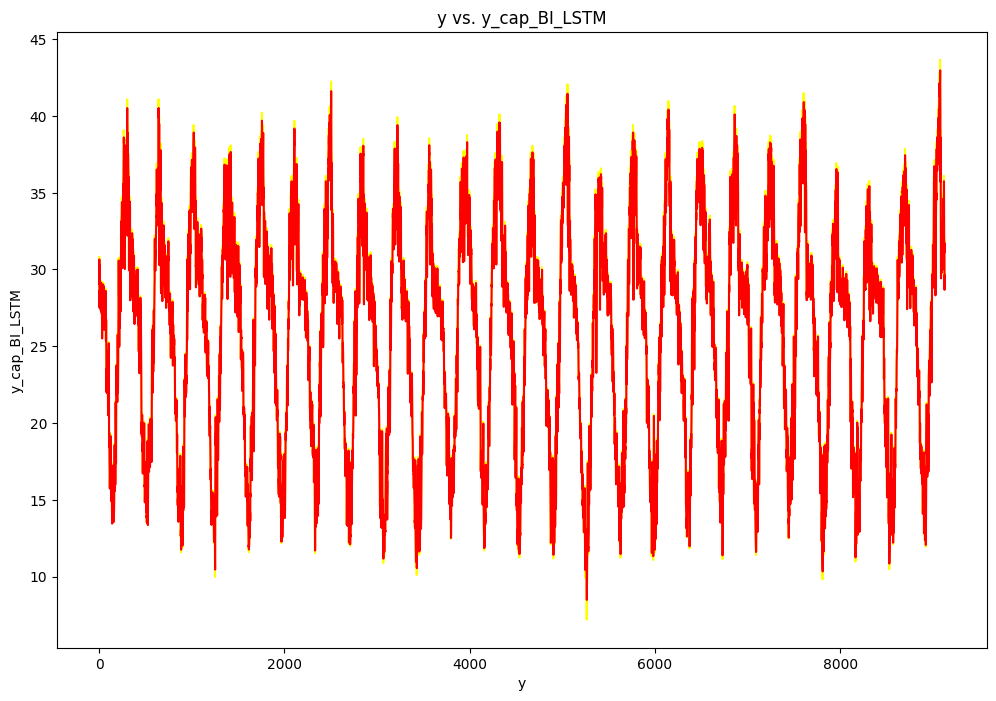

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y,'yellow')
plt.plot(y_cap_BI_LSTM,color='red')
plt.title('y vs. y_cap_BI_LSTM')
plt.xlabel('y')
plt.ylabel('y_cap_BI_LSTM')

Text(0, 0.5, 'y_cap_BI_LSTM')

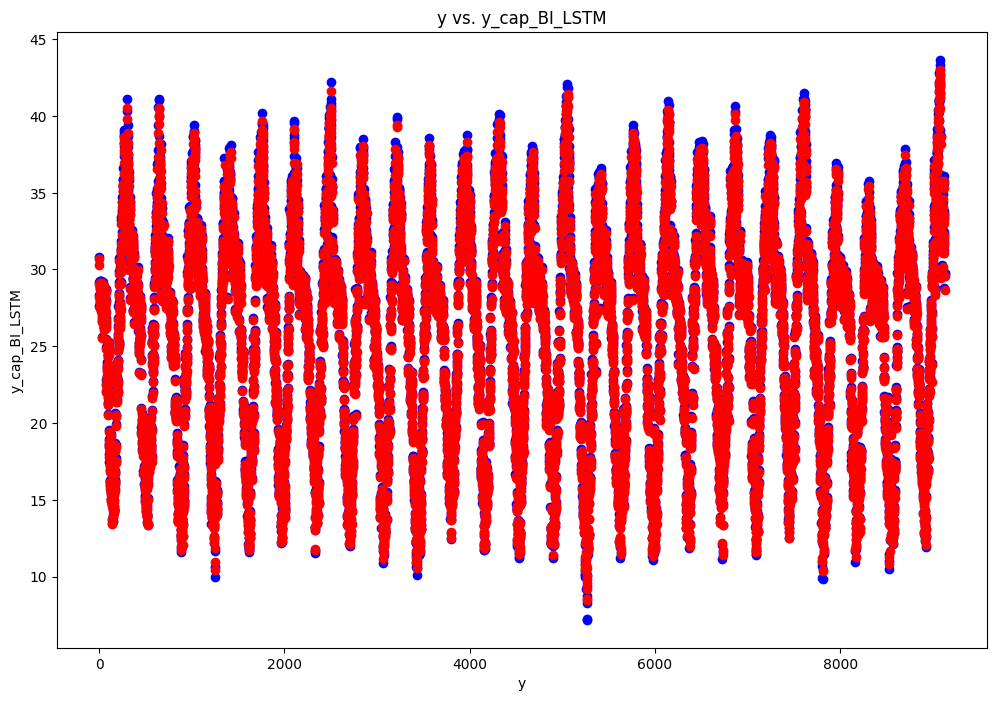

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(range(len(y)), y, color='blue', label='y')
plt.scatter(range(len(y_cap_BI_LSTM)), y_cap_BI_LSTM, color='red', label='y_cap_BI_LSTM')
plt.title('y vs. y_cap_BI_LSTM')
plt.xlabel('y')
plt.ylabel('y_cap_BI_LSTM')


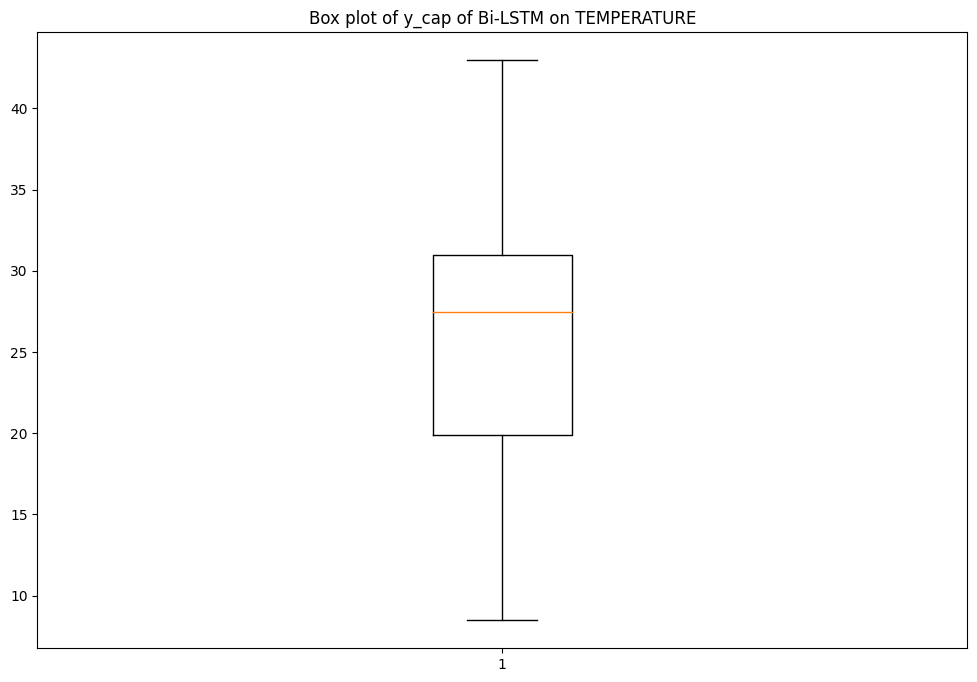

In [ ]:
plt.figure(figsize=(12,8))
plt.boxplot(y_cap_BI_LSTM)

# Adding title
plt.title("Box plot of y_cap of Bi-LSTM on TEMPERATURE")
plt.show()

# **Applying GRU**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import GRU, Dense

n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(n_steps, n_features)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

res=[]

# Fit the model
model.fit(x, y, epochs=200, verbose=0)

for i in x:
    # Demonstrate prediction
    x_input = np.array(i)
    x_input = x_input.reshape((1, n_steps, n_features))
    y_cap_gru = model.predict(x_input, verbose=0)
    res.append(y_cap_gru)

y_cap=res
y_cap_GRU = [element for sublist in y_cap for subsublist in sublist for element in subsublist]
print(y_cap_GRU)


[30.64308, 29.390451, 31.006933, 28.53873, 27.833326, 28.568491, 28.974855, 28.101822, 27.912912, 29.429993, 27.912912, 28.191256, 29.123362, 28.469275, 28.469275, 29.429993, 28.707323, 27.674072, 29.202526, 29.459646, 29.479416, 29.33112, 27.614323, 28.459352, 27.753714, 28.052126, 29.014467, 27.454924, 27.584444, 27.863176, 27.753714, 26.866192, 25.814737, 27.095873, 27.425024, 27.713896, 28.15151, 29.103567, 29.380562, 28.340235, 28.270723, 28.300516, 28.09188, 28.290585, 28.469275, 28.449427, 29.153053, 29.281672, 28.54865, 27.39512, 27.03598, 26.586273, 26.47621, 26.69628, 26.386118, 26.846207, 26.906153, 28.042185, 27.952692, 28.40973, 28.776712, 28.399801, 27.335304, 27.415058, 27.893023, 28.13164, 27.494785, 27.614323, 26.996042, 27.554562, 28.93524, 28.240923, 28.895617, 25.684221, 26.506231, 27.045961, 26.796242, 25.141314, 22.73435, 22.276993, 22.967873, 23.180933, 23.049055, 23.849525, 23.26206, 22.703878, 22.22614, 23.10993, 23.667341, 23.970915, 24.152887, 24.617338, 24.6

In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y, y_cap_GRU)
mse = metrics.mean_squared_error(y, y_cap_GRU)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y,y_cap_GRU)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.846310026371466
MSE: 1.3196316897089817
RMSE: 1.148752231644832
R-Squared: 0.9748413854169529


Text(0, 0.5, 'y_cap_GRU')

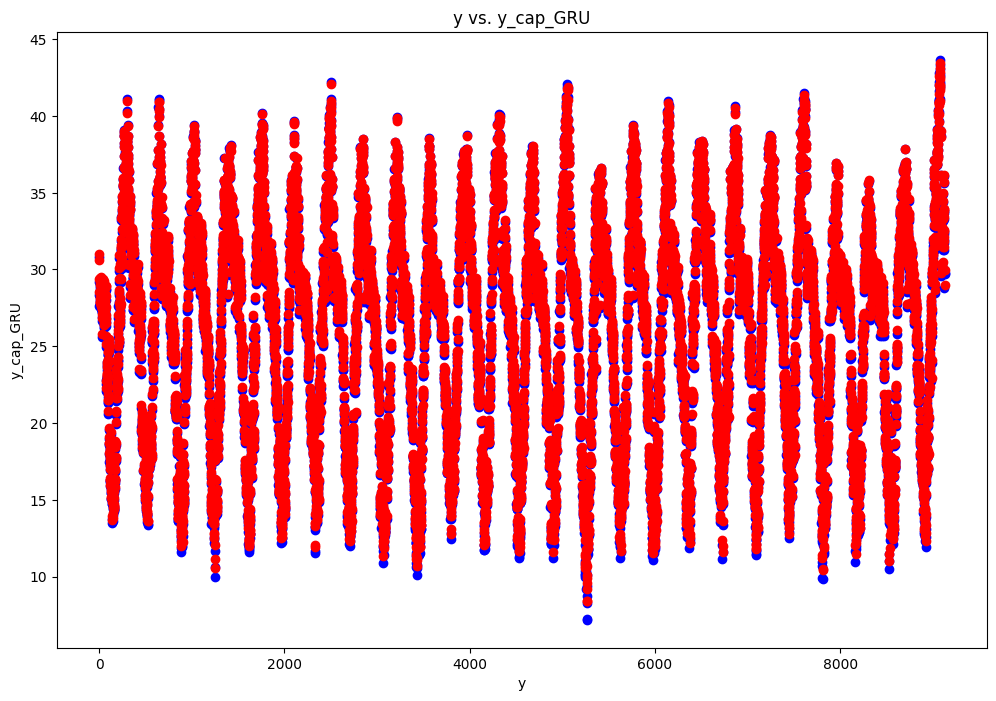

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(range(len(y)), y, color='blue', label='y')
plt.scatter(range(len(y_cap_GRU)), y_cap_GRU, color='red', label='y_cap_GRU')
plt.title('y vs. y_cap_GRU')
plt.xlabel('y')
plt.ylabel('y_cap_GRU')

Text(0, 0.5, 'y_cap_GRU')

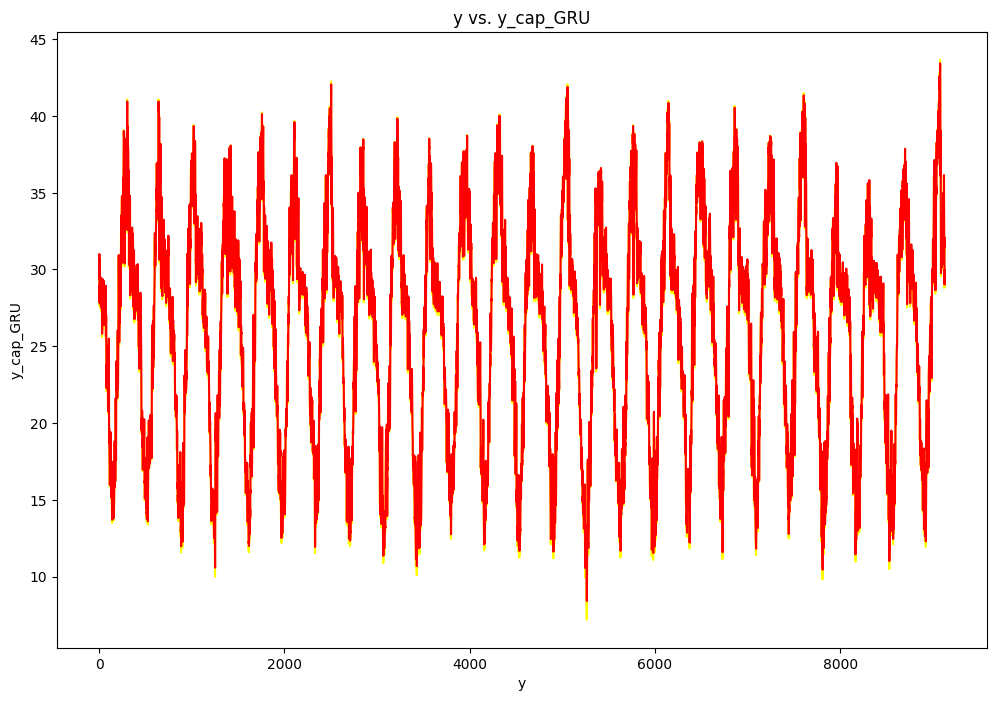

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y,'yellow')
plt.plot(y_cap_GRU,color='red')
plt.title('y vs. y_cap_GRU')
plt.xlabel('y')
plt.ylabel('y_cap_GRU')

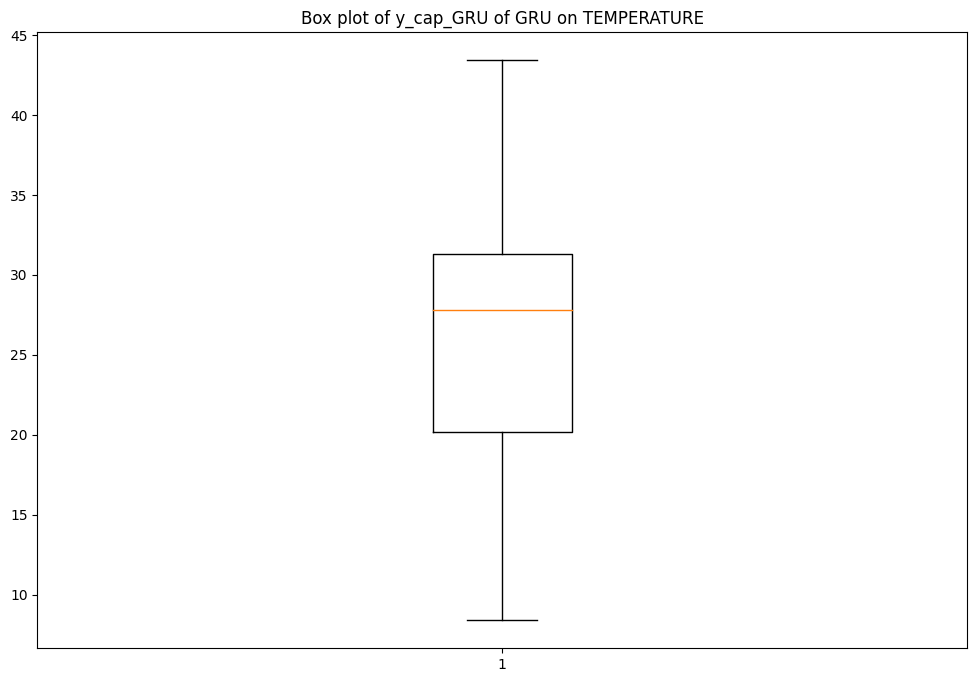

In [ ]:
plt.figure(figsize=(12,8))
plt.boxplot(y_cap_GRU)

# Adding title
plt.title("Box plot of y_cap_GRU of GRU on TEMPERATURE")
plt.show()

# **Applying CNN**

In [ ]:
x_cnn=x
y_cnn=y
print(len(x_cnn),len(y_cnn))

9130 9130


9130 9130
[30.166737, 28.930231, 30.526463, 28.091196, 27.39735, 28.120491, 28.520653, 27.661333, 27.475584, 28.96922, 27.475584, 27.749294, 28.666967, 28.022837, 28.022837, 28.96922, 28.25717, 27.240835, 28.74499, 28.998459, 29.01795, 28.871737, 27.182127, 28.013067, 27.319101, 27.61246, 28.559675, 27.025536, 27.152775, 27.426687, 27.319101, 26.447584, 25.4169, 26.672987, 26.996168, 27.279972, 27.710205, 28.647465, 28.920483, 27.895853, 27.827465, 27.856777, 27.65156, 27.847006, 28.022837, 28.003302, 28.696228, 28.822994, 28.10096, 26.9668, 26.614197, 26.173008, 26.065083, 26.280895, 25.976759, 26.427977, 26.486792, 27.602684, 27.514696, 27.964233, 28.325497, 27.954466, 26.908054, 26.98638, 27.456024, 27.690657, 27.064692, 27.182127, 26.575, 27.123413, 28.481628, 27.798155, 28.442598, 25.289091, 26.094519, 26.623997, 26.378954, 24.757729, 22.40625, 21.959917, 22.634174, 22.842152, 22.713419, 23.495012, 22.921349, 22.376513, 21.910292, 22.77284, 23.317078, 23.613588, 23.79137, 24.24529

Text(0, 0.5, 'y_cap_cnn')

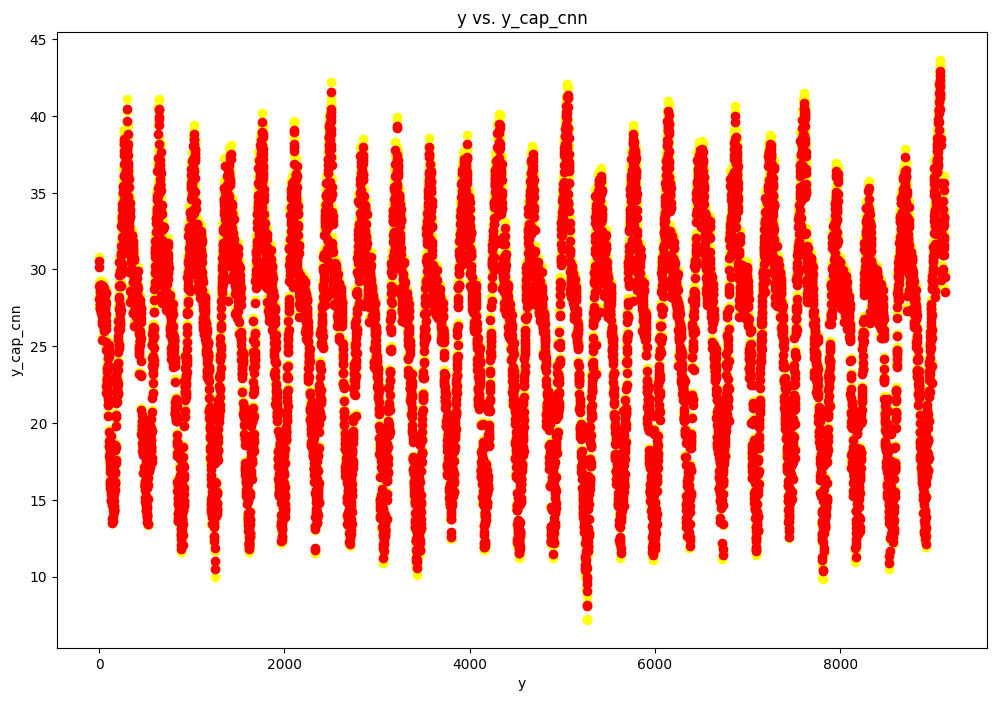

In [ ]:
# univariate cnn lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 1
n_steps = 1

x_cnn = x_cnn.reshape((x_cnn.shape[0], n_seq, n_steps, n_features))

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
print(len(x_cnn),len(y_cnn))
model.fit(x_cnn, y_cnn, epochs=500, verbose=0)
# demonstrate prediction
y_cap_cnn=[]
for i in x_cnn:
  x_input=np.array(i)
  x_input=x_input.reshape((1,n_steps,n_features))
  y_cap_cnn.append(model.predict(x_input,verbose=0))



y_cnn=y_cnn.tolist()

y_cap_cnn = [element for sublist in y_cap_cnn for subsublist in sublist for element in subsublist]
print(y_cap_cnn)

plt.figure(figsize=(12,8))
plt.scatter(range(len(y)), y, color='yellow', label='y')
plt.scatter(range(len(y_cap_cnn)), y_cap_cnn, color='red', label='y_cap_cnn')
plt.title('y vs. y_cap_cnn')
plt.xlabel('y')
plt.ylabel('y_cap_cnn')

In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y, y_cap_cnn)
mse = metrics.mean_squared_error(y, y_cap_cnn)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y,y_cap_cnn)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.8824763243509147
MSE: 1.3513376648712752
RMSE: 1.1624705006456186
R-Squared: 0.9742369149307495


In [ ]:
y_cap_cnn=res
y_cap_cnn = [element for sublist in y_cap_cnn for subsublist in sublist for element in subsublist]
print(y_cap_cnn)

[30.64308, 29.390451, 31.006933, 28.53873, 27.833326, 28.568491, 28.974855, 28.101822, 27.912912, 29.429993, 27.912912, 28.191256, 29.123362, 28.469275, 28.469275, 29.429993, 28.707323, 27.674072, 29.202526, 29.459646, 29.479416, 29.33112, 27.614323, 28.459352, 27.753714, 28.052126, 29.014467, 27.454924, 27.584444, 27.863176, 27.753714, 26.866192, 25.814737, 27.095873, 27.425024, 27.713896, 28.15151, 29.103567, 29.380562, 28.340235, 28.270723, 28.300516, 28.09188, 28.290585, 28.469275, 28.449427, 29.153053, 29.281672, 28.54865, 27.39512, 27.03598, 26.586273, 26.47621, 26.69628, 26.386118, 26.846207, 26.906153, 28.042185, 27.952692, 28.40973, 28.776712, 28.399801, 27.335304, 27.415058, 27.893023, 28.13164, 27.494785, 27.614323, 26.996042, 27.554562, 28.93524, 28.240923, 28.895617, 25.684221, 26.506231, 27.045961, 26.796242, 25.141314, 22.73435, 22.276993, 22.967873, 23.180933, 23.049055, 23.849525, 23.26206, 22.703878, 22.22614, 23.10993, 23.667341, 23.970915, 24.152887, 24.617338, 24.6

Text(0, 0.5, 'y_cap_cnn')

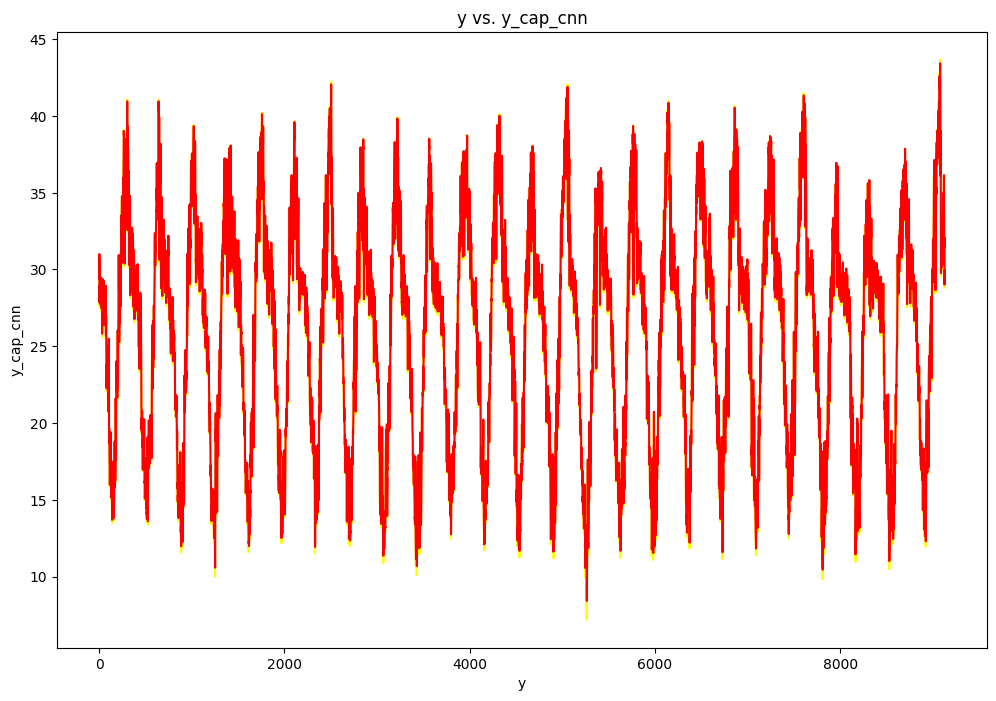

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y,'yellow')
plt.plot(y_cap_cnn,color='red')
plt.title('y vs. y_cap_cnn')
plt.xlabel('y')
plt.ylabel('y_cap_cnn')

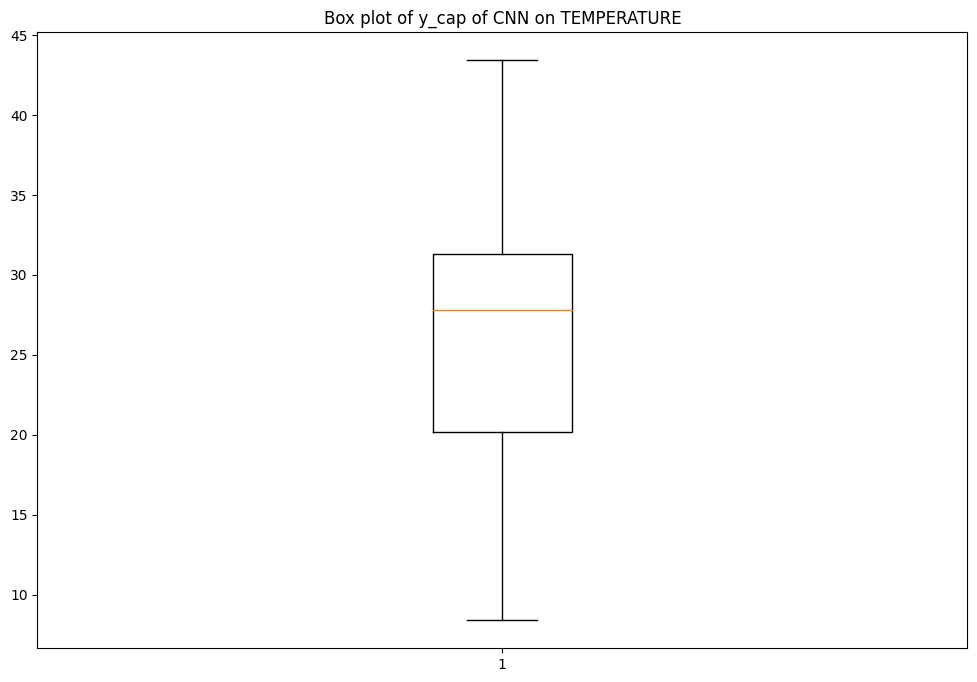

In [ ]:
plt.figure(figsize=(12,8))
plt.boxplot(y_cap_cnn)

# Adding title
plt.title("Box plot of y_cap of CNN on TEMPERATURE")
plt.show()

# **Applying RNN**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

n_features = 1
x = x.reshape((x.shape[0], x.shape[1], n_features))

model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, n_features)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

res=[]

# Fit the model
model.fit(x, y, epochs=200, verbose=0)

for i in x:
    # Demonstrate prediction
    x_input = np.array(i)
    x_input = x_input.reshape((1, n_steps, n_features))
    y_cap_rnn = model.predict(x_input, verbose=0)
    res.append(y_cap_rnn)

y_cap=res
y_cap_RNN = [element for sublist in y_cap for subsublist in sublist for element in subsublist]
print(y_cap_RNN)


[30.209845, 28.9633, 30.573011, 28.119183, 27.422297, 28.148628, 28.551056, 27.68731, 27.500816, 29.002558, 27.500816, 27.775642, 28.698286, 28.050474, 28.050474, 29.002558, 28.286045, 27.265247, 28.77681, 29.032005, 29.051636, 28.904406, 27.206358, 28.040659, 27.343773, 27.638231, 28.590317, 27.049313, 27.17691, 27.451738, 27.343773, 26.470207, 25.4396, 26.69596, 27.019865, 27.304514, 27.736385, 28.678654, 28.953485, 27.922874, 27.854168, 27.883615, 27.67749, 27.8738, 28.050474, 28.030846, 28.727732, 28.855333, 28.128998, 26.99042, 26.637072, 26.19538, 26.087412, 26.303347, 25.999073, 26.450577, 26.50947, 27.628416, 27.540077, 27.991583, 28.354748, 27.98177, 26.93153, 27.010052, 27.481186, 27.716755, 27.088573, 27.206358, 26.597807, 27.147465, 28.511797, 27.824724, 28.472534, 25.311998, 26.116858, 26.646883, 26.401499, 24.781971, 22.445925, 22.004236, 22.671679, 22.8778, 22.7502, 23.525612, 22.956322, 22.41648, 21.955158, 22.809092, 23.348932, 23.643396, 23.82007, 24.271576, 24.261759

In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(y, y_cap_RNN)
mse = metrics.mean_squared_error(y, y_cap_RNN)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y,y_cap_RNN)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.8701418314972424
MSE: 1.3324723015132325
RMSE: 1.1543276404527583
R-Squared: 0.9745965807446243


Text(0, 0.5, 'y_cap_RNN')

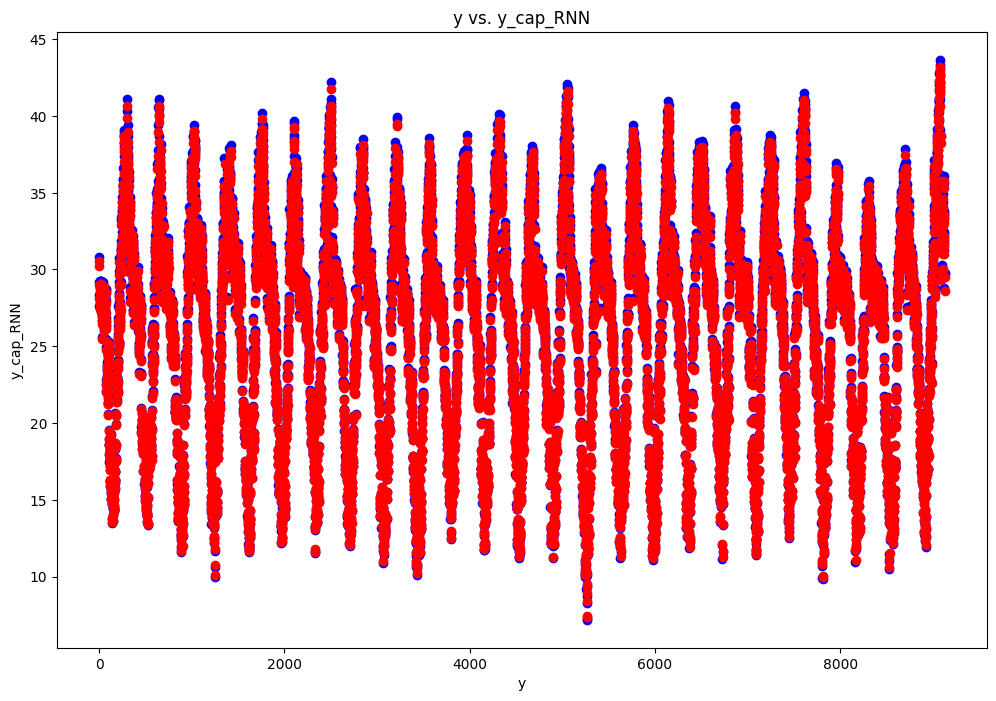

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(range(len(y)), y, color='blue', label='y')
plt.scatter(range(len(y_cap_RNN)), y_cap_RNN, color='red', label='y_cap_RNN')
plt.title('y vs. y_cap_RNN')
plt.xlabel('y')
plt.ylabel('y_cap_RNN')

Text(0, 0.5, 'y_cap_RNN')

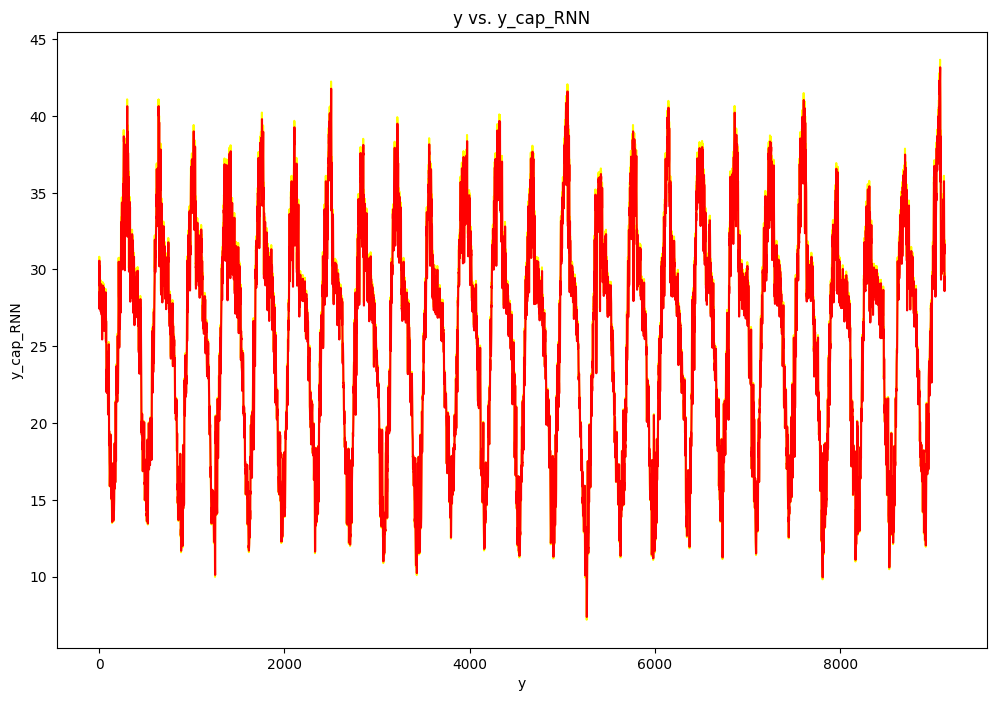

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y,'yellow')
plt.plot(y_cap_RNN,color='red')
plt.title('y vs. y_cap_RNN')
plt.xlabel('y')
plt.ylabel('y_cap_RNN')

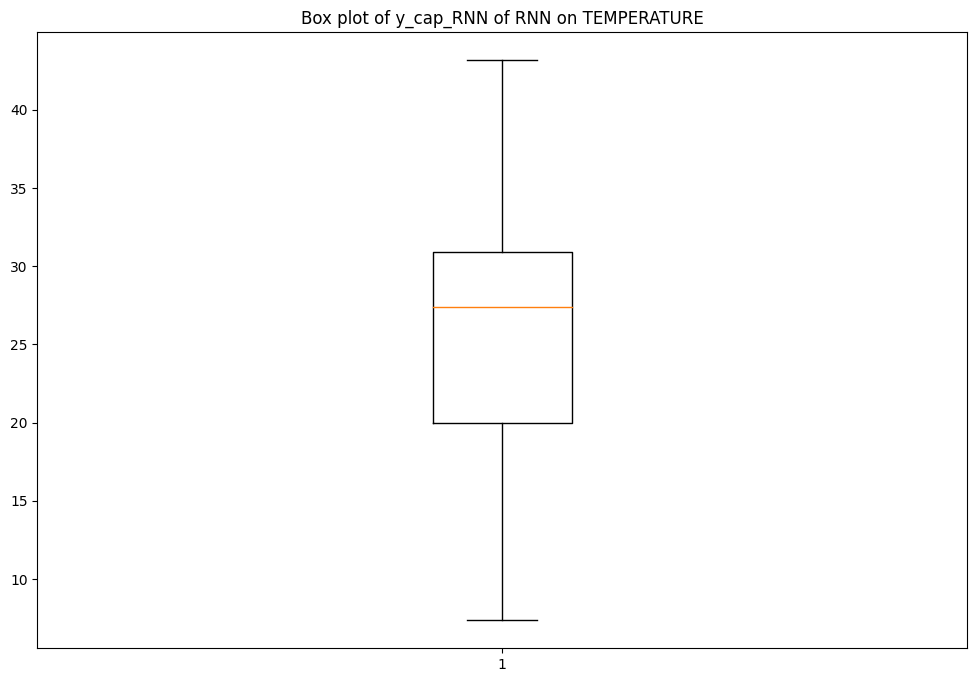

In [ ]:
plt.figure(figsize=(12,8))
plt.boxplot(y_cap_RNN)

# Adding title
plt.title("Box plot of y_cap_RNN of RNN on TEMPERATURE")
plt.show()